<a href="https://colab.research.google.com/github/DMichelA/CarPrice/blob/main/CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2.2 Preparación de los datos

* **Nombre del alumno:** Amairani Michel Duran Ibarra
* **Matrícula:** 1718110385
* **Grupo:** IDGS 91
* **Fecha de entrega:** 24/Octubre/2021


# Importar librerias 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Nos permite hacer distintos tipos de gráficas 
import scipy.stats as stats # Nos ayuda a sacar datos estadísticos 

# Cargar el dataset

In [4]:
dataframe = pd.read_csv("car_price_assignment.csv")

# Forma del dataset

In [5]:
dataframe.shape

(205, 26)

# Ver 5 primeros registros

In [6]:
dataframe.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Ver 5 últimos registros

In [7]:
dataframe.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


#  Identificar y contar valores nulos

In [8]:
dataframe.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Ver información del dataset

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Promedio de cada columna

In [10]:
dataframe.mean()

car_ID                103.000000
symboling               0.834146
wheelbase              98.756585
carlength             174.049268
carwidth               65.907805
carheight              53.724878
curbweight           2555.565854
enginesize            126.907317
boreratio               3.329756
stroke                  3.255415
compressionratio       10.142537
horsepower            104.117073
peakrpm              5125.121951
citympg                25.219512
highwaympg             30.751220
price               13276.710571
dtype: float64

# Medidas de tendencia central en columnas específicas

In [11]:
cols = ['symboling', 'wheelbase', 'carlength', 'carwidth'] # Seleccionamos columnas
for col in cols:
  print("Colmna {} : Mean {}".format(col,dataframe[col].mean()))
  print("Colmna {} : Median {}".format(col,dataframe[col].median()))
  print("Colmna {} : Mode {}".format(col,dataframe[col].mode()))

Colmna symboling : Mean 0.8341463414634146
Colmna symboling : Median 1.0
Colmna symboling : Mode 0    0
dtype: int64
Colmna wheelbase : Mean 98.75658536585378
Colmna wheelbase : Median 97.0
Colmna wheelbase : Mode 0    94.5
dtype: float64
Colmna carlength : Mean 174.04926829268305
Colmna carlength : Median 173.2
Colmna carlength : Mode 0    157.3
dtype: float64
Colmna carwidth : Mean 65.90780487804875
Colmna carwidth : Median 65.5
Colmna carwidth : Mode 0    63.8
dtype: float64


# Describir el dataset

In [12]:
dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Correlación entre pares de columnas

In [13]:
dataframe.corr() # Identificar la correlación es útil para tener como resultado un modelo simple, ya que identificamos las relaciones que tendrán mayor impacto en la predicción del valor. 

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


# Graficar la correlación entre columnas con un HEATMAP

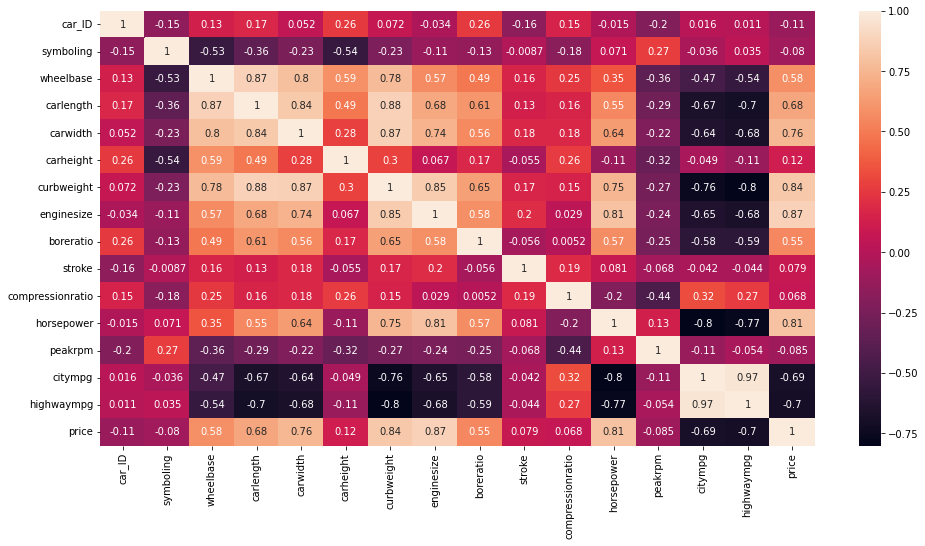

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(dataframe.corr(), annot=True)
plt.show()
# Identificar visualmente la columnas con una correlación más fuerte

# HEATMAP de Valores Nulos

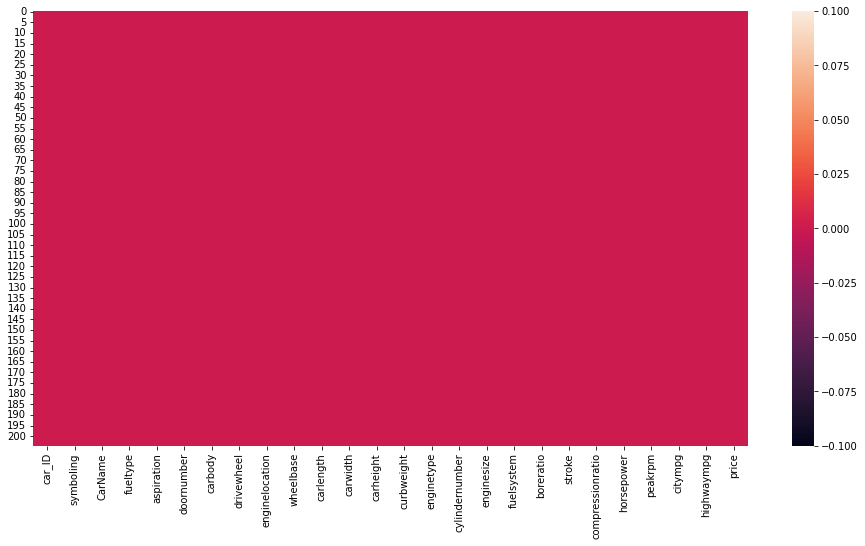

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(dataframe.isnull())
plt.show()

# Función para seleccionar columnas con una corralación específica

In [16]:
def correlation(dataframe, threshold):
    cols_corr = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i,j]) >= threshold:
          col_name = corr_matrix.columns[i]
          cols_corr.add(col_name)
    return cols_corr

In [17]:
corr_cols = correlation(dataframe.iloc[:,:-1],0.90) # Nos devuelve las columnas que tienen una correlación mayor a 0.90
corr_cols

{'highwaympg'}

# Separar columnas categóricas 

In [18]:
def categorical(dataframe):
  categorical_col = []
  for col in dataframe:
    if dataframe[col].dtype == 'object':
      categorical_col.append(col)
  return categorical_col

In [19]:
categorical_col = categorical(dataframe)
print(categorical_col)

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


# Obtener columnas numéricas

In [20]:
def numerical(dataframe):
  numerical_col = []
  for col in dataframe:
    if dataframe[col].dtype != 'object':
      numerical_col.append(col)
  return numerical_col

In [21]:
numerical_col = numerical(dataframe)
print(numerical_col)

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


# Graficar una columna 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


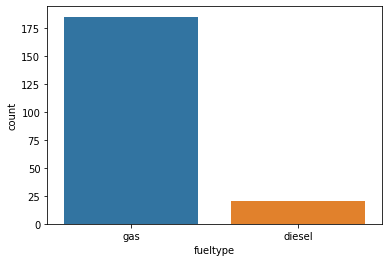

In [22]:
sns.countplot(dataframe['fueltype'])

# Graficar todas las columnas categóricas COUNT y BOX PLOT

In [23]:
print(categorical_col)
print(len(categorical_col))

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
10


In [24]:
categorical_col.remove('CarName') # Quitar la columna Nombre del CarName 
print(len(categorical_col))

9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

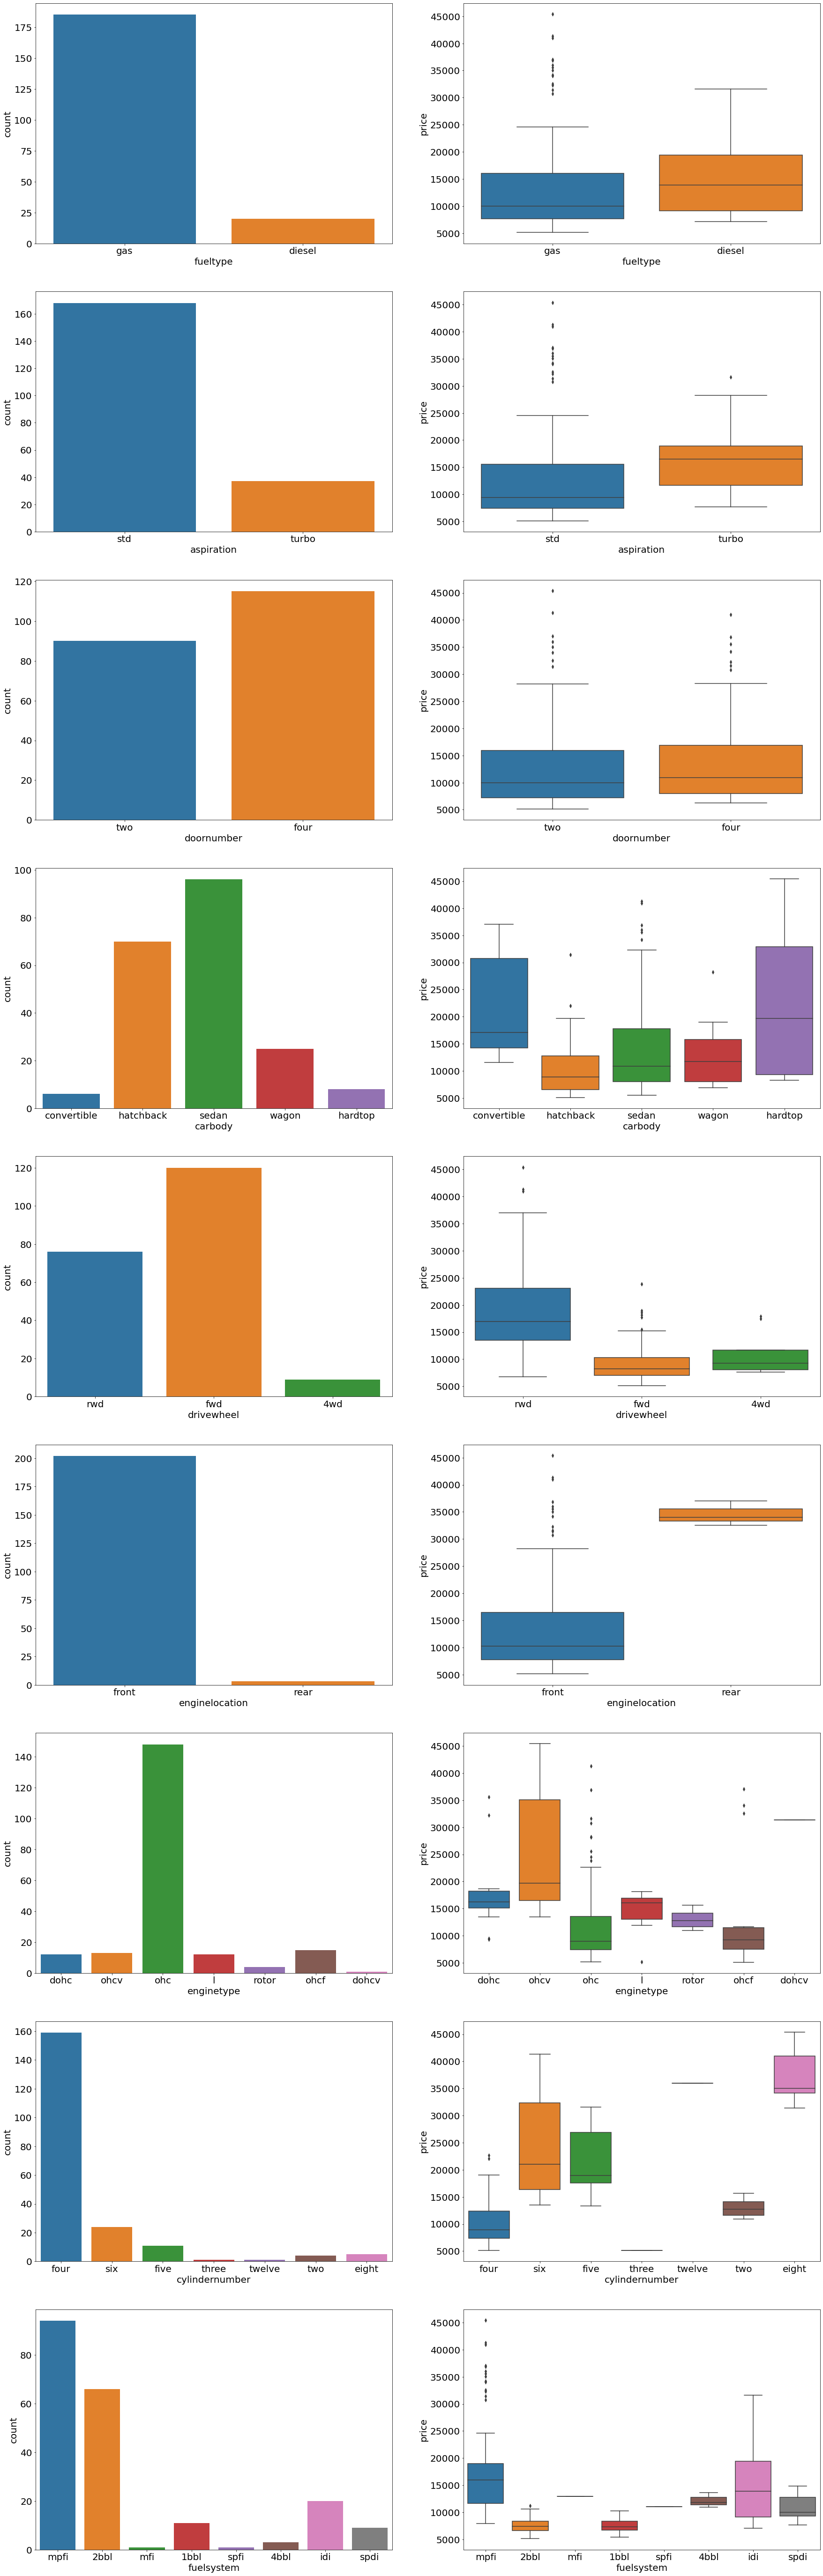

In [25]:
i = 1
plt.figure(figsize=(30,100))
for col in categorical_col:
  # COUNT PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.countplot(dataframe[col])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count", fontsize=20)

  i = i + 1

  # BOX PLOT
  plt.subplot(len(categorical_col),2,i)
  sns.boxplot(x=dataframe[col],y=dataframe["price"])
  plt.yticks(fontsize=20)
  plt.xticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("price", fontsize=20)

  i = i + 1

plt.show()

# Graficar una columna numérica

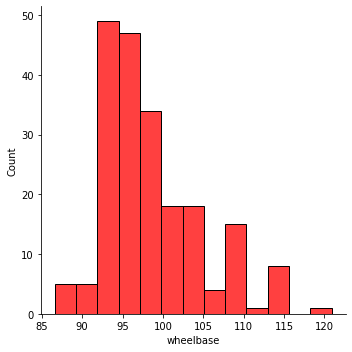

In [26]:
sns.displot(dataframe['wheelbase'],color='red')

# Graficar las columnas numéricas

In [27]:
print(numerical_col)
print(len(numerical_col))

['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
16


In [28]:
numerical_col.remove('car_ID') # Quitar la columna Nombre del car_ID por ser un identificador  
numerical_col.remove('price')
print(len(numerical_col))

14


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

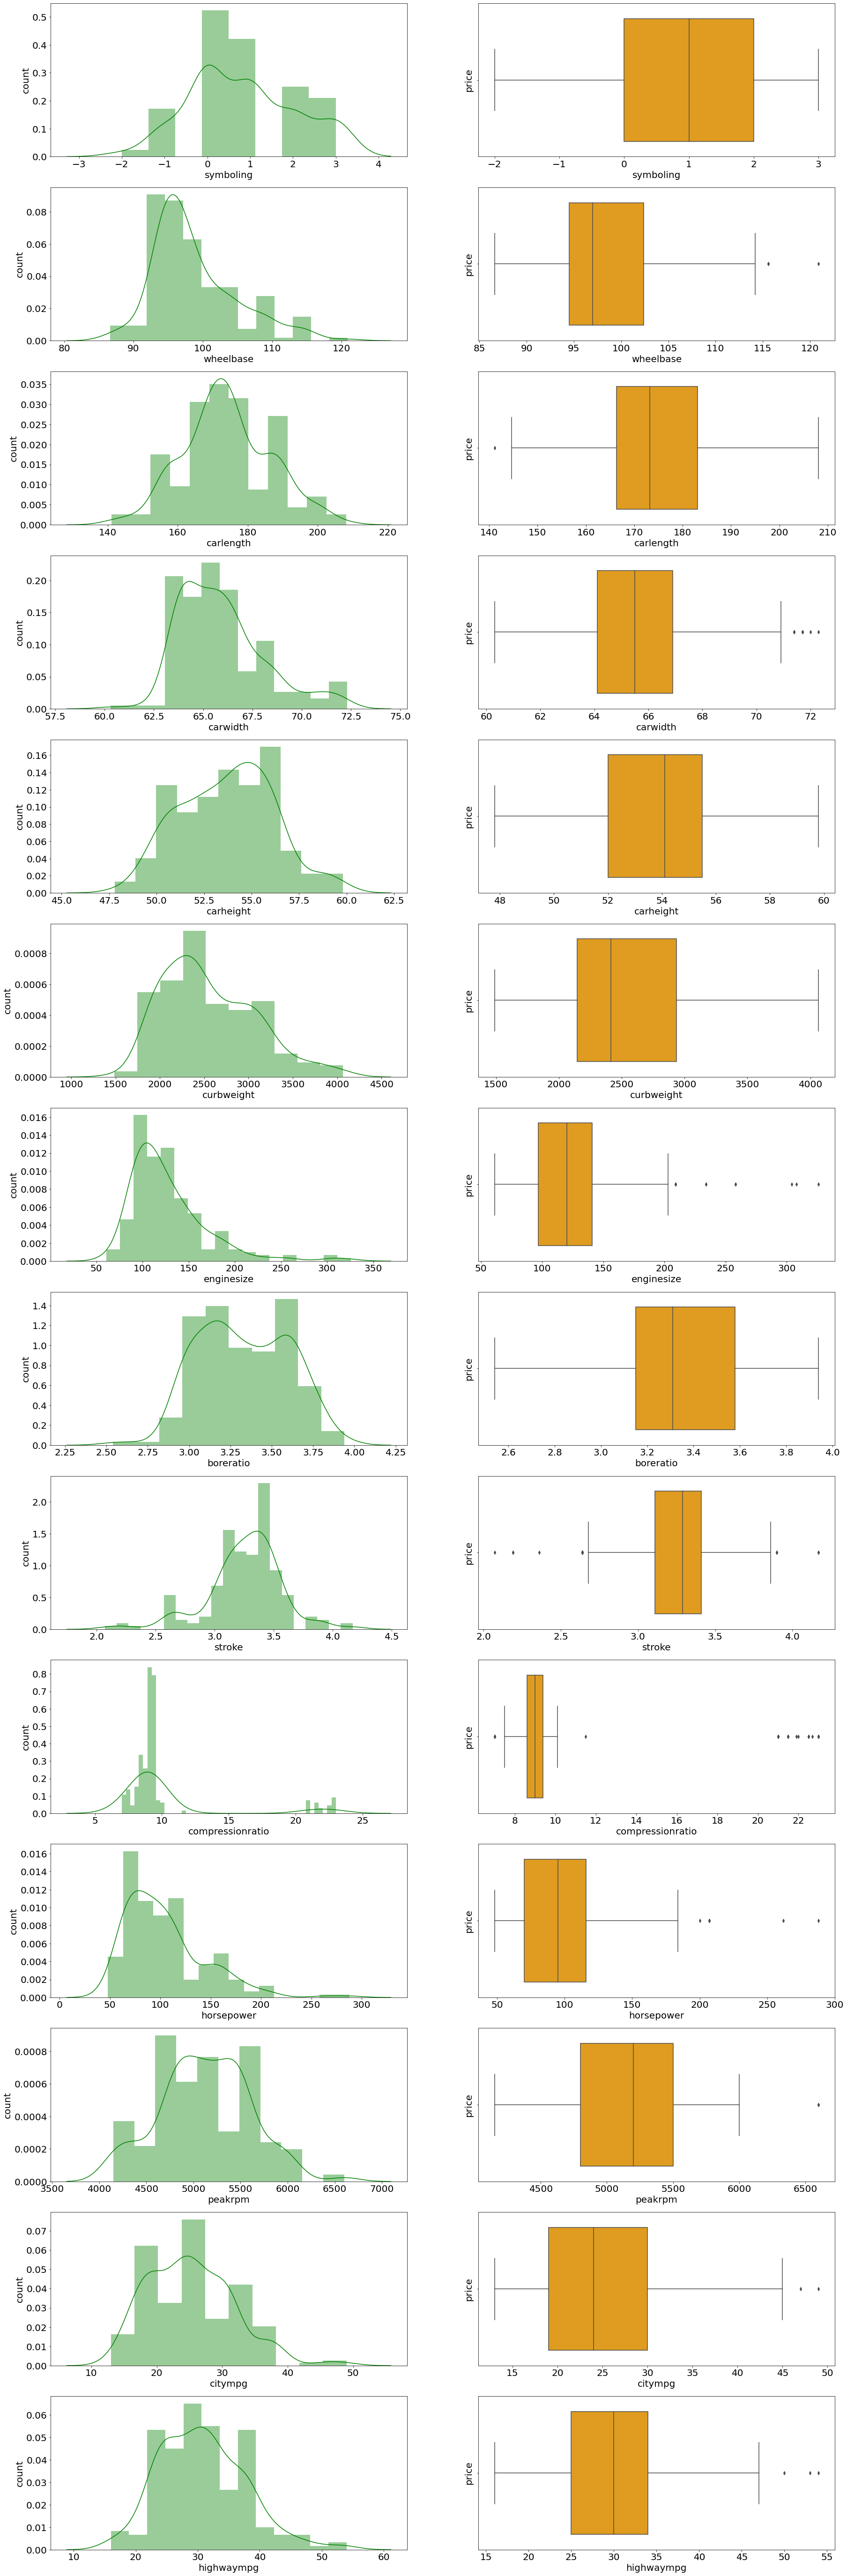

In [29]:
i = 1
plt.figure(figsize=(30,100))
for col in numerical_col:
  # COUNT PLOT
  plt.subplot(len(numerical_col),2,i)
  sns.distplot(dataframe[col],color='green')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("count",fontsize=20)

  i = i + 1

  # BOX PLOT
  plt.subplot(len(numerical_col),2,i)
  sns.boxplot(dataframe[col],color='orange')
  plt.xticks(fontsize=20)
  plt.yticks(fontsize=20)
  plt.xlabel(col,fontsize=20)
  plt.ylabel("price",fontsize=20)

  i = i + 1

plt.show()

# Conclusión

Con la realización de esta actividad pude darme una idea de como y que hacer en el análisis de un dataset. Es importante hacer un buen análisis de los datos ya que el algoritmo que desarrollemos aprende de los datos de entrada que nosotros le proporcionamos, y aunque el algoritmo aprende, sólo puede extraer sentido de los datos que le proporcionamos. Los algoritmos no tienen capacidad de intuición como nosotros los humanos, por lo que el éxito del modelo depende principalmente de los datos de entrada.


Además, una vez que concemos los pasos "escenciales" para el análisis de los datos podemos realizar funciones genéricas para volver a reutilizarlas a lo largo del proceso de análisis. 


Por otro lado, comprendi que la visualización puede ser algo muy fundamental para entender los datos con los que estamos trabajando. Las librerias que nos permiten visualizar los datos de manera grafica en mapas de calor, graficas simples, entre muchas otras, nos brindan una descripción clara de los datos y  con ello comprobe que una imagen vale más que mil palabras.


